In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize , LabelEncoder
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

from functions import *

In [2]:
kf = KFold(n_splits=5, shuffle=True, random_state=111)

In [ ]:
# data read and types check
df = pd.read_csv('https://raw.githubusercontent.com/paq88/Deep-Learning-in-classification-of-common-Carp-intestine-classification/refs/heads/main/Data/Gut_bacteria_merged.csv')
print(df.shape)
print(df.dtypes)
df.head()

(124, 127)
pond                                                                                           object
d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae             float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae       float64
d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae                    float64
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae                    float64
                                                                                               ...   
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae           float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae      float64
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae           float64
d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales

,pond,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
0,Gut_S10,2319.0,2187.0,1743.0,500.0,521.0,286.0,366.0,612.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gut_S10,3391.0,2071.0,355.0,1054.0,1024.0,1952.0,66.0,217.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gut_S10,1338.0,7053.0,669.0,279.0,329.0,63.0,52.0,1338.0,139.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gut_S10,1582.0,15595.0,124.0,503.0,309.0,5.0,3418.0,326.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gut_S10,1463.0,3891.0,541.0,7.0,13.0,11.0,61.0,398.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


in this approach we will fill missing values as 0, after normalisation we will change those values to some small number - 0.00001

In [4]:
df = df.fillna(0)
df.head()

,pond,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
0,Gut_S10,2319.0,2187.0,1743.0,500.0,521.0,286.0,366.0,612.0,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gut_S10,3391.0,2071.0,355.0,1054.0,1024.0,1952.0,66.0,217.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gut_S10,1338.0,7053.0,669.0,279.0,329.0,63.0,52.0,1338.0,139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Gut_S10,1582.0,15595.0,124.0,503.0,309.0,5.0,3418.0,326.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gut_S10,1463.0,3891.0,541.0,7.0,13.0,11.0,61.0,398.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(df.shape)
df.describe()
df

(124, 127)


,pond,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
0,Gut_S10,2319.0,2187.0,1743.0,500.0,521.0,286.0,366.0,612.0,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gut_S10,3391.0,2071.0,355.0,1054.0,1024.0,1952.0,66.0,217.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gut_S10,1338.0,7053.0,669.0,279.0,329.0,63.0,52.0,1338.0,139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Gut_S10,1582.0,15595.0,124.0,503.0,309.0,5.0,3418.0,326.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gut_S10,1463.0,3891.0,541.0,7.0,13.0,11.0,61.0,398.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Gut_S9,104.0,9862.0,107.0,20.0,8.0,83.0,3.0,92.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,Gut_S9,750.0,3483.0,422.0,381.0,245.0,119.0,8413.0,408.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,Gut_S9,183.0,1141.0,134.0,200.0,105.0,11.0,12974.0,124.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,Gut_S9,490.0,167.0,8.0,86.0,50.0,2.0,23193.0,66.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
predictors = df.columns[1:]
print(len(predictors))

126


Becouse we have a lot of big numbers and a lot of variation between collumns we might try to normalise the data for better results, on the other hand we could also not normalise so itll be easier for model to discover differences between bacteria abduance as a predictor value. our next steps are:
- plot our data to see for any outliers (ask prof) ew. outlier treatment 
- convert classification variable (target variable)
- create predictors and target varaiable sets
- normalise predictors set 

## CLR transformation

In [7]:
df[predictors] = pd.DataFrame(clr_manual(df[predictors]),columns = df[predictors].columns)

In [8]:
df.describe()

,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,5.184129,8.149255,3.644067,1.438091,1.940012,2.662686,1.427626,4.205627,1.532341,0.765683,...,-0.609693,-0.572431,-0.611040,-0.531471,-0.591769,-0.557780,-0.606219,-0.609693,-0.584653,-0.604748
std,1.444798,1.072265,1.554761,2.158231,2.209887,1.951443,2.819811,1.903593,1.951759,1.643831,...,0.327155,0.416136,0.319306,0.624163,0.391066,0.584453,0.373966,0.349500,0.417752,0.403019
min,-0.325684,4.708501,-0.436293,-1.245936,-0.858576,-0.859457,-1.472139,-0.656742,-1.245936,-1.245936,...,-1.515104,-1.515104,-1.515104,-1.515104,-1.515104,-1.515104,-1.515104,-1.515104,-1.515104,-1.515104
25%,4.245242,7.605297,3.165891,-0.408017,-0.366712,1.568823,-0.539976,3.359390,-0.374288,-0.452238,...,-0.764629,-0.756155,-0.764629,-0.746398,-0.756155,-0.756155,-0.764629,-0.764629,-0.756155,-0.770888
50%,5.502807,8.190011,3.971892,0.400069,2.041522,2.687662,-0.279643,4.723931,1.130598,-0.307177,...,-0.576803,-0.557009,-0.576803,-0.545442,-0.557009,-0.557009,-0.576803,-0.576803,-0.545442,-0.582855
75%,6.197913,9.010625,4.739503,3.659931,4.141260,4.021147,3.221774,5.387763,3.452128,2.208847,...,-0.401424,-0.395451,-0.401424,-0.389485,-0.399562,-0.399562,-0.401424,-0.401424,-0.395451,-0.401424
max,7.913779,9.793854,6.362286,5.991671,5.983094,7.360192,9.636186,7.295474,5.159305,4.819431,...,1.341129,1.932118,1.174075,4.517037,2.316767,3.730798,2.134445,1.703662,2.742058,2.591176


## conversion of class variable


Explanation of pond coding
| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [9]:
codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}
codes3 = {0 : [8,14,18,24,29], 1: [12,16,19,23,26,9,13,17,20,27], 2 : [10,21,28,30,32,11,15,22,25,31]}
codes2 = {0 : [8,14,18,24,29,12,16,19,23,26,9,13,17,20,27], 1 : [10,21,28,30,32,11,15,22,25,31]}

df['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
df['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
df['pond_2'] = df['pond'].apply(lambda x: pond_decoder(x,codes2))

C:\Users\marek\AppData\Local\Temp\ipykernel_28056\3235696872.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
C:\Users\marek\AppData\Local\Temp\ipykernel_28056\3235696872.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
C:\Users\marek\AppData\Local\Temp\ipykernel_28056\3235696872.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [10]:
df = df.copy()

In [13]:
# implement smote algorytm to oversample missing values we have one missing observation
smote = SMOTE(random_state=111)
X_resampled , y_resampled = smote.fit_resample(df[predictors], df['pond_5'])
df_5 = pd.concat([X_resampled, y_resampled], axis=1)

df_val_train, df_test = train_test_split(df_5, test_size=0.2, random_state=111, stratify=df_5['pond_5'])

## Splitting data into train and test sets

In [14]:
# creating test train and validation set 
X = X_resampled.to_numpy().astype('float32')
X=X.reshape(125,126,1)
print(X.shape)

y = y_resampled
y.shape
y = keras.utils.to_categorical(y, num_classes=5)
y.shape


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111,stratify = y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(125, 126, 1)
(100, 126, 1) (25, 126, 1) (100, 5) (25, 5)


At this point we should have test set with size of 10 and training set with size of 15 ready for later moddeling 

# Model building, compiling, fitting

My initial strategy as we have not much data is to have some more dropout to prevent overfitting and lower learning rate as well as more epochs to compensate for dropout.
- For loss function we will use [caterogical crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) as we have several labeled categories
- For metrics we will use [sparse caterogical crossentropy](https://keras.io/api/metrics/probabilistic_metrics/#categoricalcrossentropy-class) as it works well with our integer mutliclass predictor variable
- For optimizer we will chose Adam as it is an usual choice [optimzier choosing](https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e) we will set small learning rate at beggining but it might be that our network will rapidly stop learning becouse of that, in that case it is neccesary to update learning rate to bigger number
- As in this approach we will be building CNN's we will have one 1 dimensional convolutional layer
- No maxpooling layer as we dont want to lose information about position and as it is for temporal data 

## model building and compiling


In [15]:
model1 = keras.Sequential()



model1.add(keras.layers.Conv1D(filters=2, kernel_size=25, activation='relu',input_shape = (126,1),kernel_regularizer=keras.regularizers.l2(0.01)))
model1.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model1.add(keras.layers.MaxPooling1D(pool_size = 4))
model1.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model1.add(Flatten())
model1.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model1.add(keras.layers.Dropout(rate = 0.25))
model1.add(keras.layers.Dense(16, activation = 'relu'))
model1.add(keras.layers.Dense(5, activation ='softmax'))

model1.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 102, 2)         │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 99, 1)          │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24, 64)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        49,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,986 (195.26 KB)

 Trainable params: 49,986 (195.26 KB)

 Non-trainable params: 0 (0.00 B)

## Crossvalidation 

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.5500 - loss: 1.7582
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
predicted classes:       [3 1 1 2 2 3 2 1 0 1 1 2 2 3 0 0 3 0 2 2]
true validation classes: [2 1 1 0 2 4 2 4 0 1 1 4 3 3 0 4 3 1 2 4]
mean confidence score: 12.001, sd confidence score: 21.9499
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5500 - loss: 1.3912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted classes:       [4 2 1 2 1 0 0 1 3 2 0 0 1 4 0 4 2 1 2 2]
true validation classes: [4 2 0 0 1 0 3 1 3 3 2 1 4 4 0 2 2 4 2 2]
mean confidence score: 7.5684, sd confidence score: 11.4623
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 2.2631
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
predicted classes:       [0 4 4 3 2 4 2 4 2 1 0 4 3 3 0 4 0 4 2 1]
true validation classes: [4 0 4 3 2 3 0 4 2 1 0 1 3 4 2 1 3 1 2 1]
mean confidence score: 27.5273, sd confidence score: 35.9322

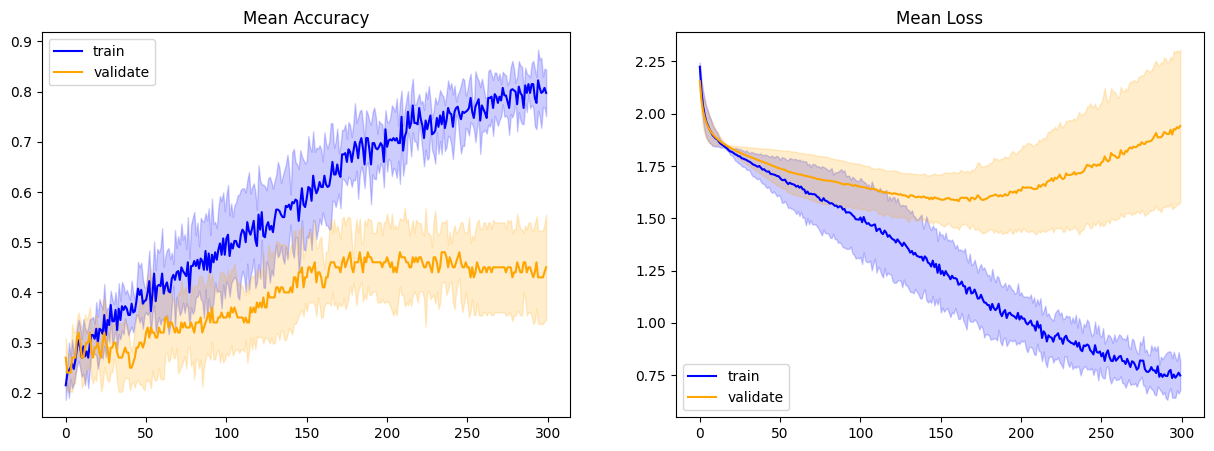

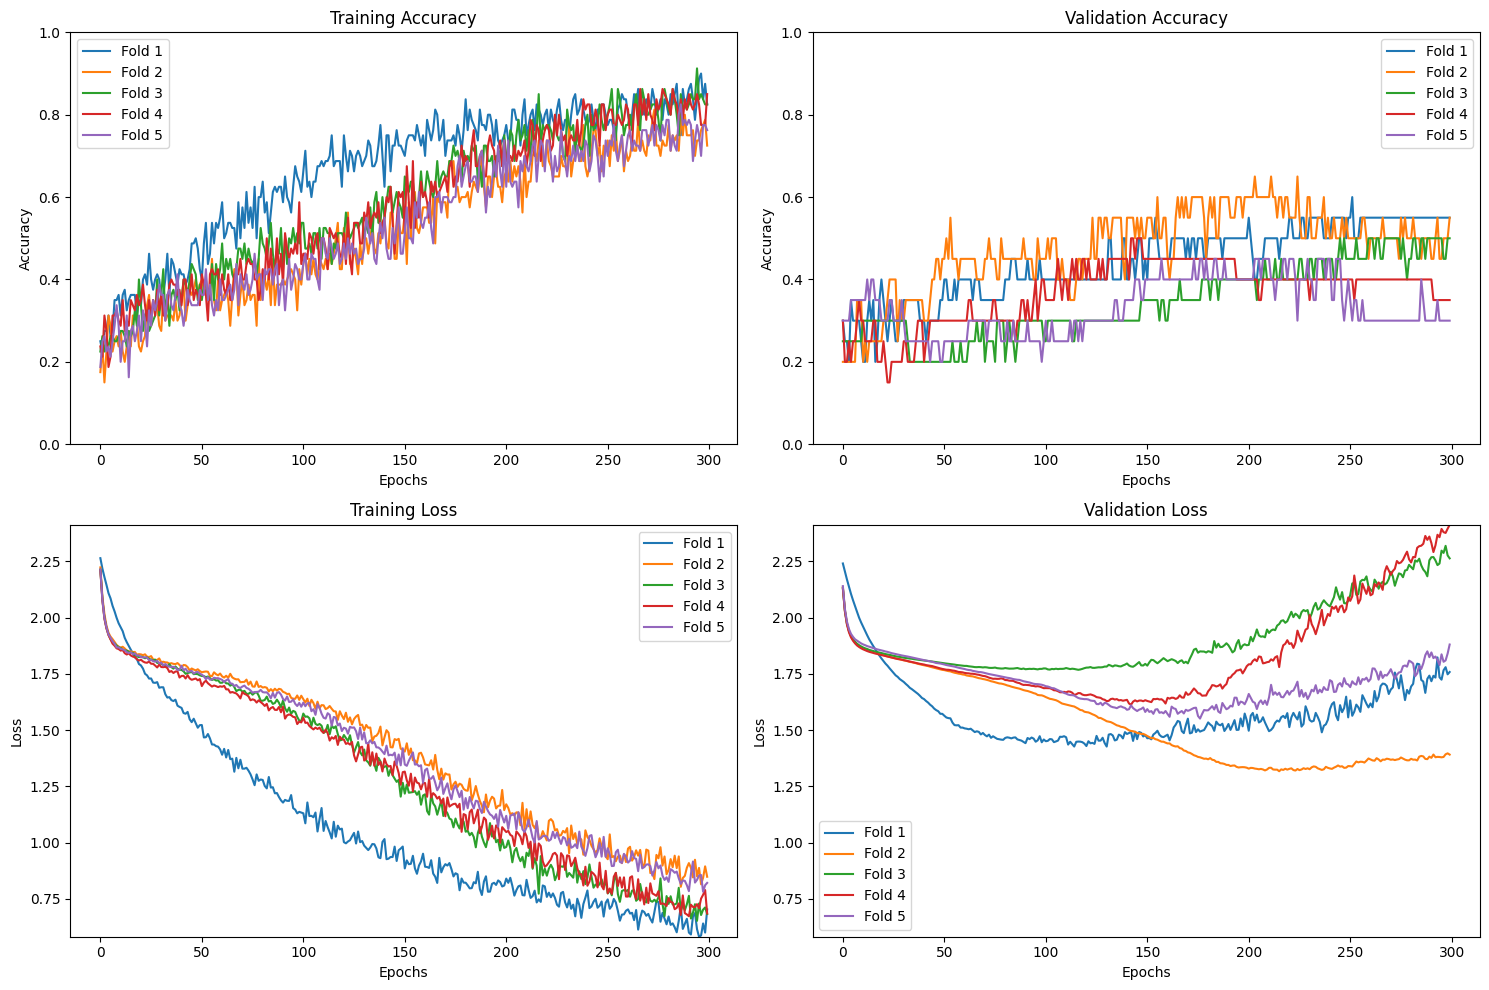

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted classes:       [4 1 3 0 0 1 4 3 1 1 0 0 4 1 1 4 1 1 1 3]
true validation classes: [1 3 2 0 2 4 0 3 0 4 0 3 2 4 1 1 3 1 0 3]


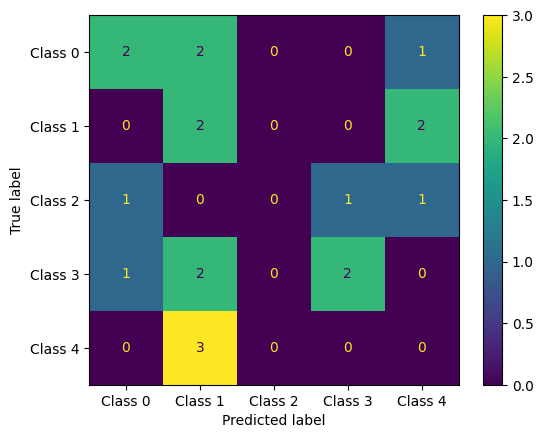

In [16]:
reset_weights(model1)
crossvalidate(df_val_train, model1, predictors, 'pond_5',kf,300,True)

## model fiting 

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2173 - loss: 2.2108 - val_accuracy: 0.2800 - val_loss: 2.0269
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2509 - loss: 1.9885 - val_accuracy: 0.3600 - val_loss: 1.9402
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2328 - loss: 1.9320 - val_accuracy: 0.3200 - val_loss: 1.9060
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2449 - loss: 1.8916 - val_accuracy: 0.2800 - val_loss: 1.8872
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2253 - loss: 1.8808 - val_accuracy: 0.3200 - val_loss: 1.8760
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2387 - loss: 1.8595 - val_accuracy: 0.3600 - val_loss: 1.8678
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2905 - loss: 1.8477 - val_accuracy: 0.3600 - val_loss: 1.8605
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2994 - loss: 1.8463 - val_accuracy: 0.4000 - v

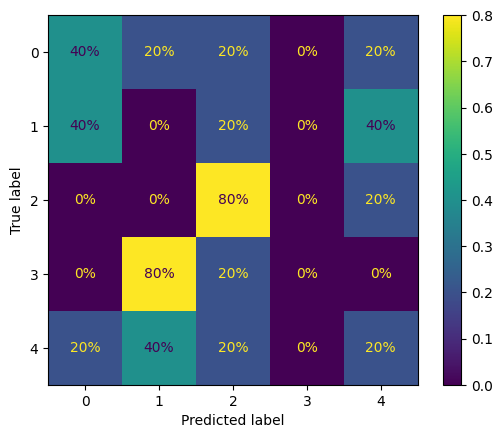

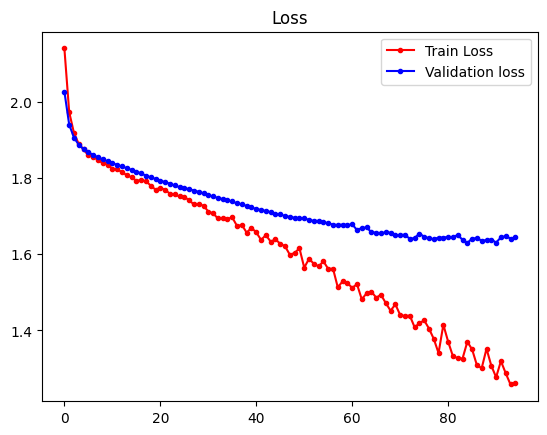

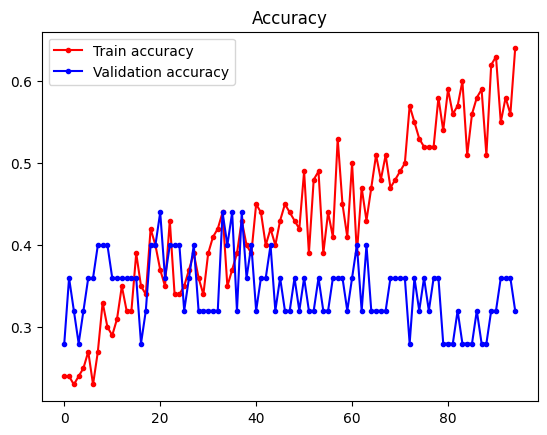

In [17]:

reset_weights(model1)
history1=model1.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
evaluate_model(model1, history1, X_test, y_test)

# 3 Classes

In [18]:
# implement smote algorytm to oversample missing values we have one missing observation
smote = SMOTE(random_state=111)
X_resampled , y_resampled = smote.fit_resample(df[predictors], df['pond_3'])
df_3 = pd.concat([X_resampled, y_resampled], axis=1)

df_val_train, df_test = train_test_split(df, test_size=0.2, random_state=111, stratify=df['pond_3'])

In [19]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv1D(filters=2, kernel_size=25, activation='relu',input_shape = (126,1),kernel_regularizer=keras.regularizers.l2(0.01)))
model2.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model2.add(keras.layers.MaxPooling1D(pool_size = 4))
model2.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model2.add(Flatten())
model2.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model2.add(keras.layers.Dropout(rate = 0.25))
model2.add(keras.layers.Dense(16, activation = 'relu'))
model2.add(keras.layers.Dense(3, activation ='softmax'))

model2.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model2.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 102, 2)         │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 99, 1)          │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 24, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24, 64)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │        49,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,952 (195.12 KB)

 Trainable params: 49,952 (195.12 KB)

 Non-trainable params: 0 (0.00 B)

Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.6000 - loss: 1.8881
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
predicted classes:       [2 1 2 1 1 2 0 2 2 1 2 1 2 2 1 1 2 1 1 1]
true validation classes: [2 1 2 2 2 2 0 1 1 1 2 1 2 2 2 2 2 0 2 1]
mean confidence score: 594.2364, sd confidence score: 1111.5259
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5500 - loss: 1.9790
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted classes:       [0 2 2 1 1 2 0 2 2 2 2 1 1 1 1 2 2 2 1 2]
true validation classes: [0 0 2 1 1 2 1 2 1 1 0 1 1 2 1 1 1 1 1 2]
mean confidence score: 85.8532, sd confidence score: 228.7399
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 1.4672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
predicted classes:       [1 1 2 0 0 0 2 2 1 1 1 2 1 1 1 1 1 0 1 2]
true validation classes: [1 1 0 0 1 2 2 1 2 0 1 2 1 0 1 2 0 0 2 2]
mean confidence score: 13458.3353, sd confidence score

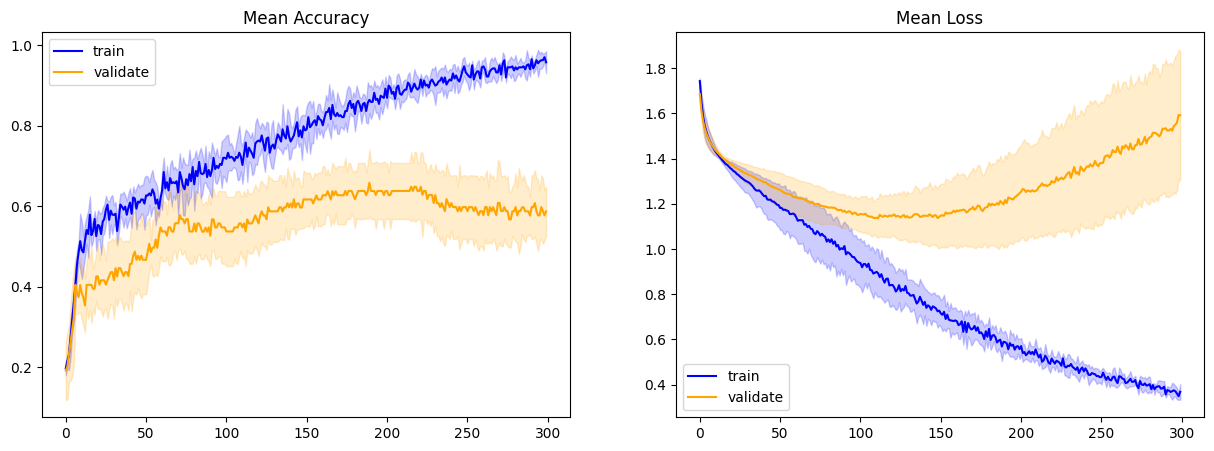

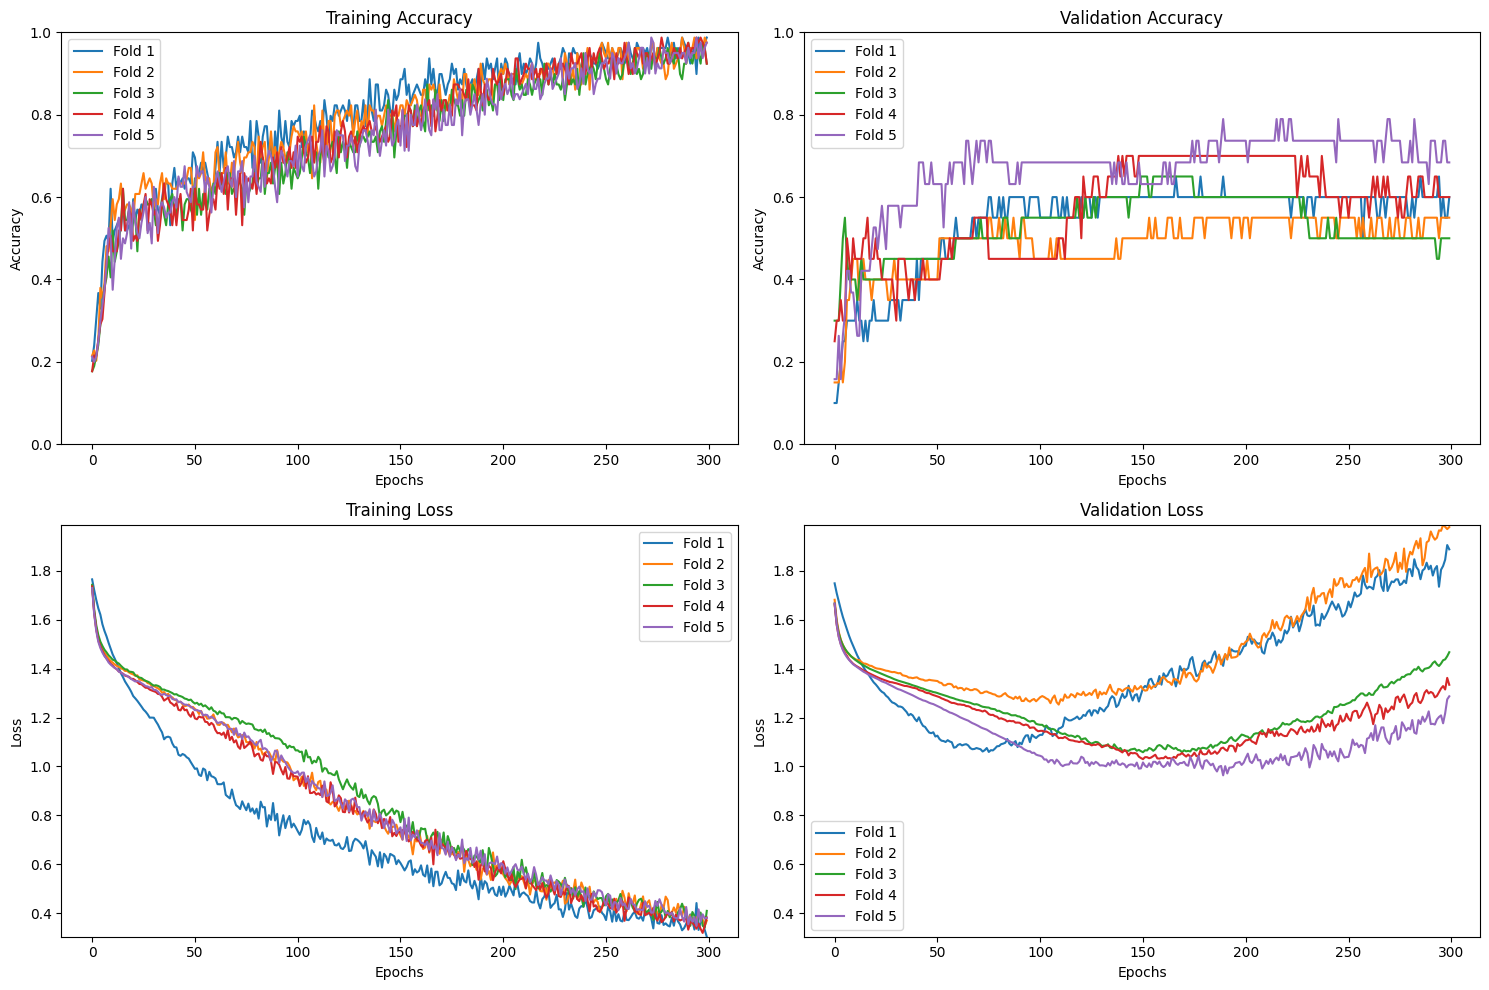

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
predicted classes:       [0 2 0 1 2 2 0 0 0 2 0 1 2 1 0 2 2 0 1]
true validation classes: [0 2 0 1 2 2 0 1 1 2 1 1 2 2 2 2 2 1 1]


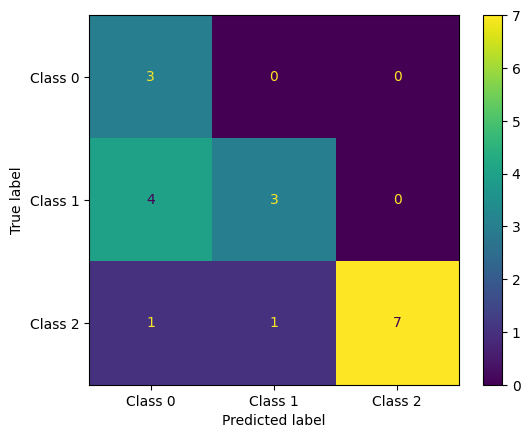

In [20]:
crossvalidate(df_val_train, model2, predictors, 'pond_3',kf,300,True)

In [21]:
# creating test train and validation set 
X = df[predictors].to_numpy().astype('float32')
X=X.reshape(124,126,1)
print(X.shape)

y = df['pond_3']
y.shape
y = keras.utils.to_categorical(y, num_classes=3)
y.shape


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111,stratify = y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(124, 126, 1)
(99, 126, 1) (25, 126, 1) (99, 3) (25, 3)


Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1600 - loss: 1.7331 - val_accuracy: 0.2000 - val_loss: 1.5892
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2930 - loss: 1.5636 - val_accuracy: 0.1600 - val_loss: 1.5107
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2986 - loss: 1.4977 - val_accuracy: 0.2800 - val_loss: 1.4743
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3112 - loss: 1.4632 - val_accuracy: 0.3200 - val_loss: 1.4514
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5230 - loss: 1.4367 - val_accuracy: 0.3600 - val_loss: 1.4354
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6595 - loss: 1.4128 - val_accuracy: 0.3600 - val_loss: 1.4230
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4667 - loss: 1.4062 - val_accuracy: 0.3600 - val_loss: 1.4108
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5217 - loss: 1.3901 - val_accuracy: 0.4000 - v

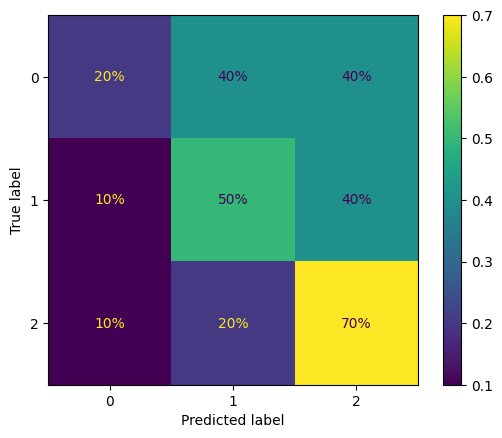

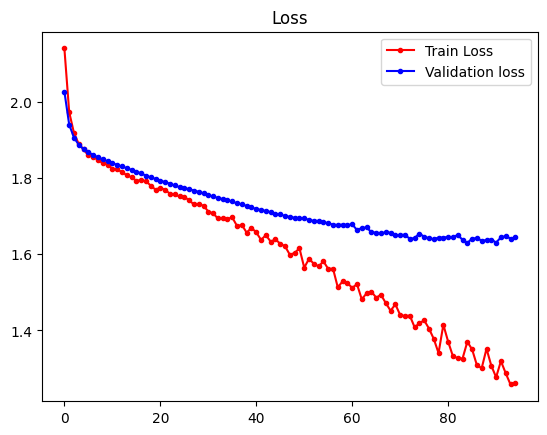

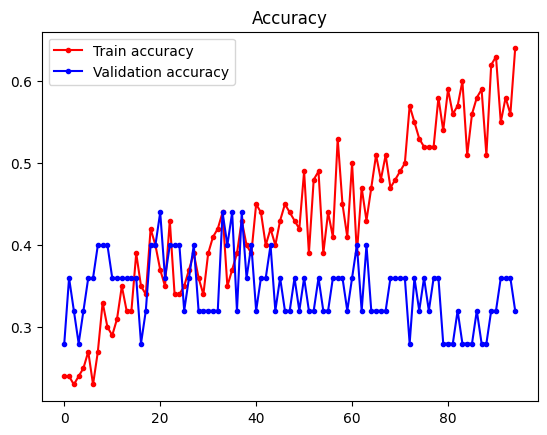

In [22]:
reset_weights(model2)
history2=model2.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
evaluate_model(model2, history1, X_test, y_test)

# 2 Class

In [23]:

df_val_train, df_test = train_test_split(df, test_size=0.2, random_state=111, stratify=df['pond_2'])

In [24]:
model3 = keras.Sequential()
model3.add(keras.layers.Conv1D(filters=2, kernel_size=25, activation='relu',input_shape = (126,1),kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.MaxPooling1D(pool_size = 4))
model3.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model3.add(Flatten())
model3.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dropout(rate = 0.25))
model3.add(keras.layers.Dense(16, activation = 'relu'))
model3.add(keras.layers.Dense(2, activation ='softmax'))

model3.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model3.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 102, 2)         │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 99, 1)          │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 24, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24, 64)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │        49,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,935 (195.06 KB)

 Trainable params: 49,935 (195.06 KB)

 Non-trainable params: 0 (0.00 B)

Number of classes: 2
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.4000 - loss: 0.7976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
predicted classes:       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
true validation classes: [1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0]
mean confidence score: 0.7926, sd confidence score: 0.0155
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7500 - loss: 0.6459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted classes:       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
true validation classes: [0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1]
mean confidence score: 0.2462, sd confidence score: 0.0
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6500 - loss: 0.6601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted classes:       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
true validation classes: [0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1]
mean confidence score: 0.3649, sd confidence score: 0.0
training 

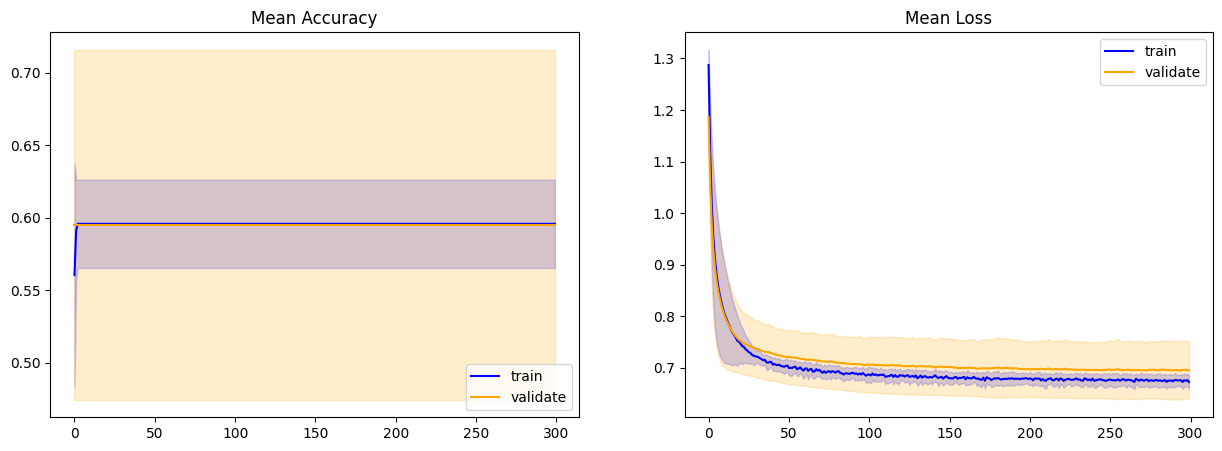

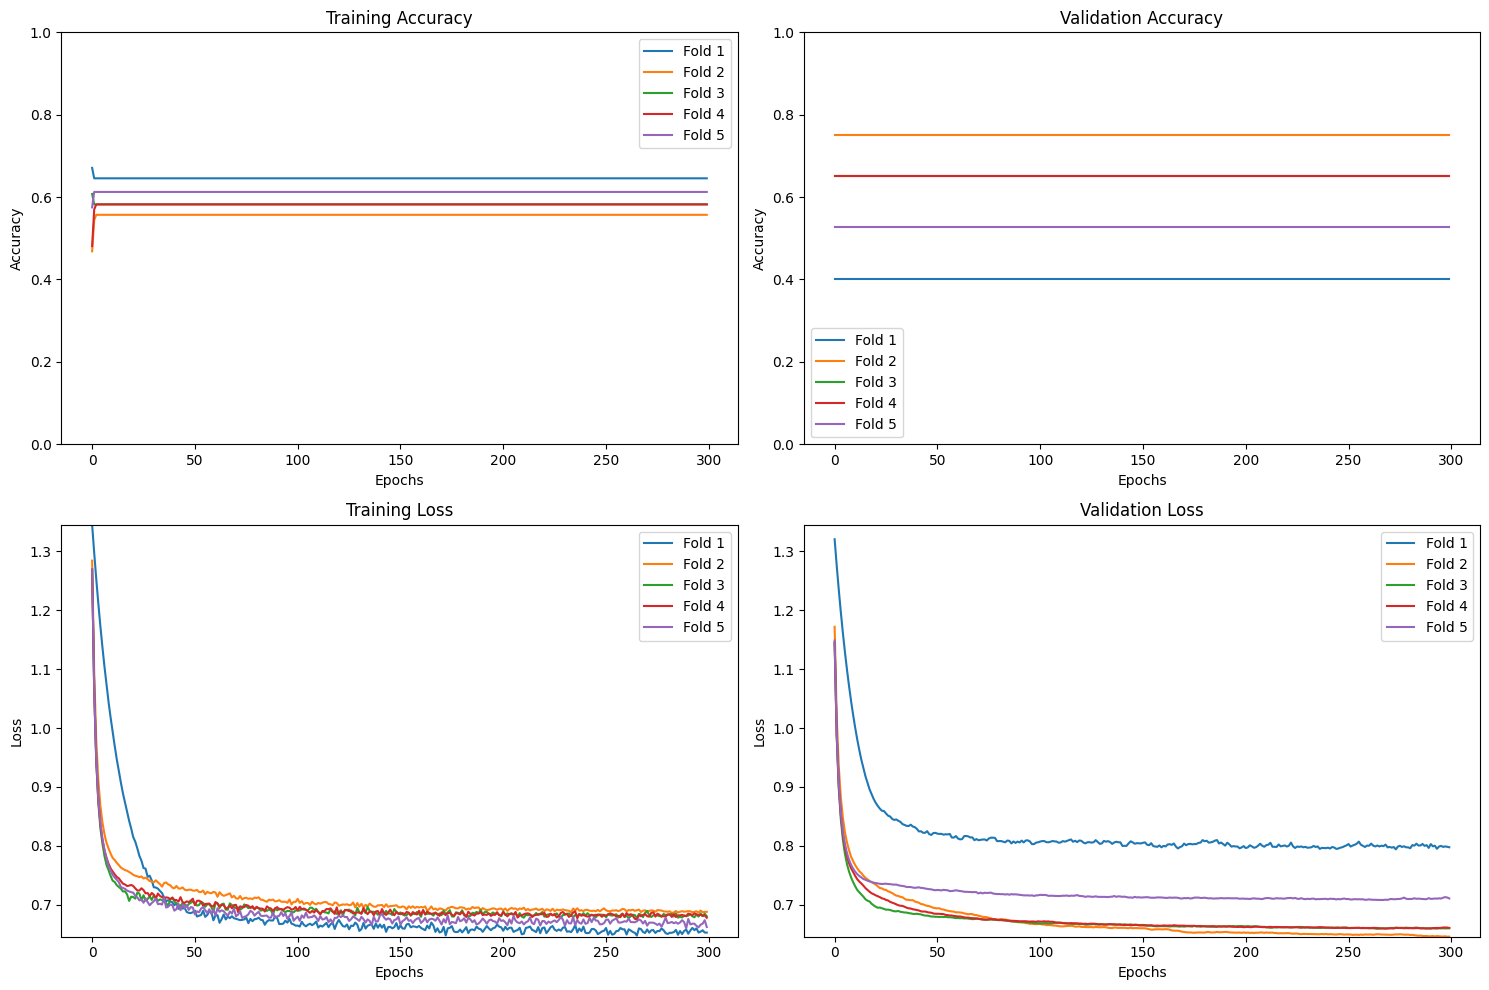

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted classes:       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
true validation classes: [0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0]


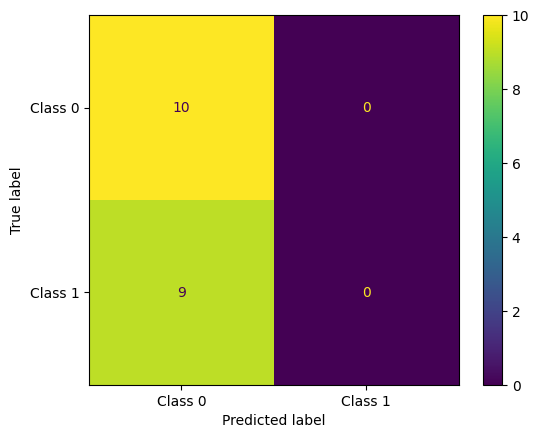

In [25]:
crossvalidate(df_val_train, model3, predictors, 'pond_2',kf,300,True)

In [26]:
# creating test train and validation set 
X = df[predictors].to_numpy().astype('float32')
X=X.reshape(124,126,1)
print(X.shape)

y = df['pond_2']
y.shape
y = keras.utils.to_categorical(y, num_classes=2)
y.shape


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111,stratify = y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(124, 126, 1)
(99, 126, 1) (25, 126, 1) (99, 2) (25, 2)


Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5419 - loss: 1.2636 - val_accuracy: 0.6000 - val_loss: 0.9942
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5675 - loss: 0.9513 - val_accuracy: 0.6000 - val_loss: 0.8617
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6197 - loss: 0.8454 - val_accuracy: 0.6000 - val_loss: 0.8089
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5367 - loss: 0.8027 - val_accuracy: 0.6000 - val_loss: 0.7823
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6051 - loss: 0.7772 - val_accuracy: 0.6000 - val_loss: 0.7667
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5785 - loss: 0.7646 - val_accuracy: 0.6000 - val_loss: 0.7562
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6213 - loss: 0.7531 - val_accuracy: 0.6000 - val_loss: 0.7492
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5913 - loss: 0.7510 - val_accuracy: 0.6000 - v

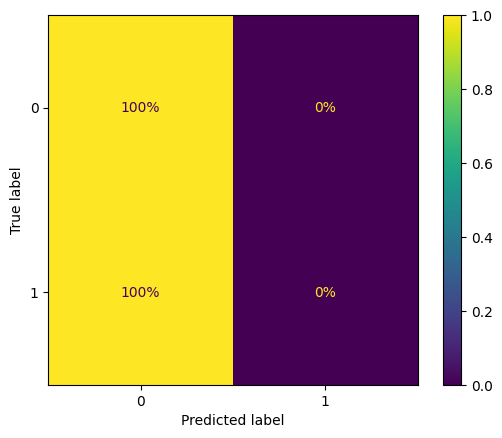

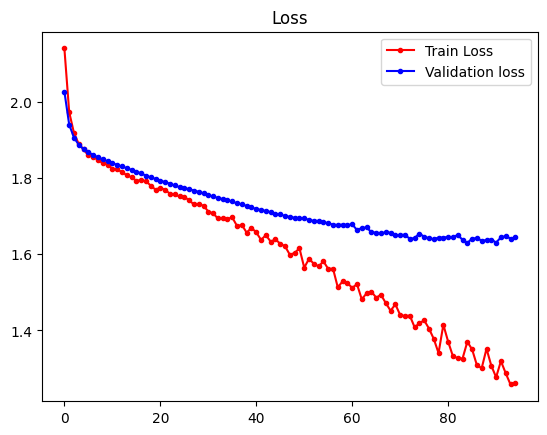

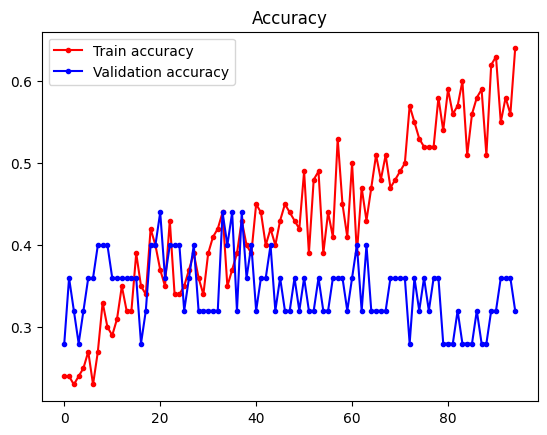

In [27]:
reset_weights(model3)
history3=model3.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
evaluate_model(model3, history1, X_test, y_test)